In [133]:
### Here a prediction for gender (male/female) is made based on weight/height for fitness associated wristband data
# Here we will find out whether 
# 1. any presence of Nan values and if so how to clean the data
# 2. how genders are distributed across the data
# 3. Which attributes (height/weight) serve as best indicator for logistic Regression

In [134]:
# import and read in data
import pandas as pd
import numpy as np
df=pd.read_csv('Documents/iMac/Github/Machine Learning Projects/Purchasing Old car-Bad Buy/Machine-Learning-Projects/Sex Prediction based on data obtained from wristband/fit_gender.csv',sep='\;',engine='python')
df.head()

,"""height",weight,"gender"""
0,"""184.75",79.2,"male"""
1,"""177.8",90.8,"male"""
2,"""186.22",86.3,"male"""
3,"""184.7",83.8,"male"""
4,"""186.29",74.9,"female"""


In [135]:
# import and read in data
import pandas as pd
import numpy as np
df=pd.read_csv('Documents/iMac/Github/Machine Learning Projects/Purchasing Old car-Bad Buy/Machine-Learning-Projects/Sex Prediction based on data obtained from wristband/fit_gender.csv',sep='\;',engine='python')
df.head()

,"""height",weight,"gender"""
0,"""184.75",79.2,"male"""
1,"""177.8",90.8,"male"""
2,"""186.22",86.3,"male"""
3,"""184.7",83.8,"male"""
4,"""186.29",74.9,"female"""


### Exploratory data analysis

In [136]:
#checking the data infos
df.dtypes
len(df.columns)
df.shape

(91, 3)

In [137]:

df.columns

Index(['"height', 'weight', 'gender"'], dtype='object')

In [138]:
# Remove the extra quotation marks from the column names
df.columns = df.columns.str.replace('"', '')
df.columns

Index(['height', 'weight', 'gender'], dtype='object')

In [139]:
# Getting a rough overview of the data through visualization
#import libraries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import math


min_value=df['height'].min()
max_value=df['height'].max()
print(min_value)
print(max_value)

"165.75
"197.72


In [140]:
# Remove the extra quotation marks from the 'height' column names
df['height'] = df['height'].str.replace('"', '')
#df

In [141]:
df['height'] = pd.to_numeric(df['height'])
min_value=df['height'].min()
max_value=df['height'].max()
print('Minimum value of height:',min_value)
print('Maximum value of height:',max_value)

Minimum value of height: 165.75
Maximum value of height: 197.72


In [142]:
# Simple way to strip double quotes from column names as well as column values
#df.columns=df.columns.str.strip('"') # remove double quotes from column names
#df=df.apply(lambda X:X.astype(str).str.strip('"')) # remove double quotes from all column values

In [143]:
# Quotation remarks need to be removed like columns
#df['height'] = pd.to_numeric(df['height'])

#min_value = df['height'].min()
#max_value = df['height'].max()

#print("Minimum value of height: ", min_value)
#print("Maximum value of height: ", max_value)


<Axes: xlabel='height', ylabel='weight'>

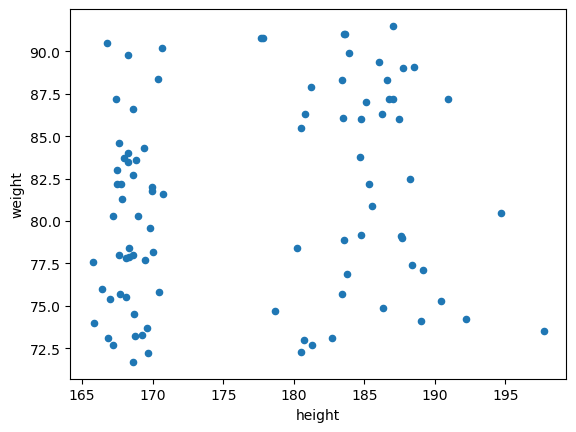

In [144]:
#df[['height','weight','gender']]=df['height weight gender'].str.split(expand=True)
df.plot (kind="scatter", x="height", y="weight")
#plt.xlim([165,195])
#plt.show()

<Axes: xlabel='height', ylabel='weight'>

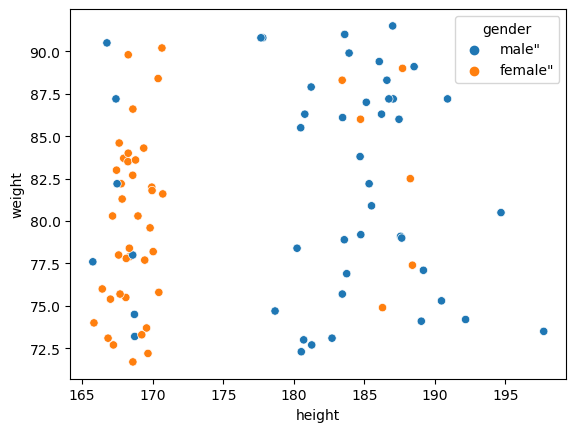

In [145]:
sns.scatterplot(data=df,x='height',y='weight',hue='gender')


### 1. Are there any missing values ( NaN )? Does the data need to be cleaned?

In [146]:
# check the data type
df.dtypes

height    float64
weight    float64
gender     object
dtype: object

In [147]:
# gender needs to be converted into categorical column
df['gender']=df ['gender'].astype('category')
df.dtypes

height     float64
weight     float64
gender    category
dtype: object

In [148]:
# check presence of any missing values 
df.isna().sum()

height    0
weight    0
gender    0
dtype: int64

In [149]:
# check for the descriptive statistics
df.describe()

,height,weight
count,91.000000,91.000000
mean,176.974615,81.153846
std,9.061819,5.865384
min,165.750000,71.700000
25%,168.345000,75.750000
50%,177.670000,80.900000
75%,185.240000,86.300000
max,197.720000,91.500000


### 2. How genders are distributed in the data

In [150]:
# check if gender over/under representation is present in the data
# create a contingency table to get the frequency and use 'crosstab'


#gender_ct=pd.crosstab(index=df['height'].count(),df['weight'].count()],
                        #columns=df['gender'],
                      #margins=True,
                      #normalize=True)
#gender_ct

In [151]:
# absolute values
print(df.groupby('gender').size())

gender
female"    45
male"      46
dtype: int64


In [152]:

# in percentage
print(pd.crosstab(index=df['gender'],columns='count', normalize='columns'))



col_0       count
gender           
female"  0.494505
male"    0.505495


In [153]:
 # Remove the extra quotation marks from the gender column names

### Which personal attributes (height, weight) renders a better gender indication

In [154]:
# Here logistic regression (LR) will be employed. Since LR wont work with categorical data types, we will 
# encode the 'gender' column as numeric variable where o= for female and 1 for male

In [155]:
# Encoding 'gender' column with 0=female and 1 =male
df.replace('male"',1,inplace =True)
df.replace('female"',0,inplace=True)
df
           

,height,weight,gender
0,184.75,79.2,1
1,177.80,90.8,1
2,186.22,86.3,1
3,184.70,83.8,1
4,186.29,74.9,0
...,...,...,...
86,169.95,81.8,0
87,185.34,82.2,1
88,167.15,80.3,0
89,169.66,72.2,0


In [157]:
# Now use one prediction variable (height,weight) to predict 'gender' with statmodels

df['gender']=df['gender'].astype('int16') # converting the gender data into int
model_height=smf.logit(formula='gender~height',data=df)
result_height=model_height.fit() # fitting the particular model (logistic) to the data
print(result_height.summary())

model_weight=smf.logit(formula='gender~weight',data=df)
result_weight=model_weight.fit()
print(result_weight.summary())

Optimization terminated successfully.
         Current function value: 0.472170
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                   91
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Jun 2024   Pseudo R-squ.:                  0.3187
Time:                        21:51:46   Log-Likelihood:                -42.968
converged:                       True   LL-Null:                       -63.071
Covariance Type:            nonrobust   LLR p-value:                 2.285e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.4596      5.924     -5.311      0.000     -43.070     -19.850
height         0.1783      0.

In [158]:
# select the model with better performance. Store the intercept and slope
# Get model parameters
intercept=result_height.params['Intercept']
slope=result_height.params['height']

In [159]:
# Make predictions based on model
X=pd.Series(range(0,250,1))
X_df=pd.DataFrame({'height':X})
X_df
            

,height
0,0
1,1
2,2
3,3
4,4
...,...
245,245
246,246
247,247
248,248


In [160]:
# Predict the values from X_df using better model and store the prediction in p_y

p_y=result_height.predict(X_df) #use the threshold value 0.5 as usual
p_y

0      2.174057e-14
1      2.598449e-14
2      3.105685e-14
3      3.711938e-14
4      4.436535e-14
           ...     
245    9.999951e-01
246    9.999959e-01
247    9.999966e-01
248    9.999971e-01
249    9.999976e-01
Length: 250, dtype: float64

 The height at which it shows 50% probability an individual being male or female is 177cm


Text(0, 0.5, 'Probability of being Male')

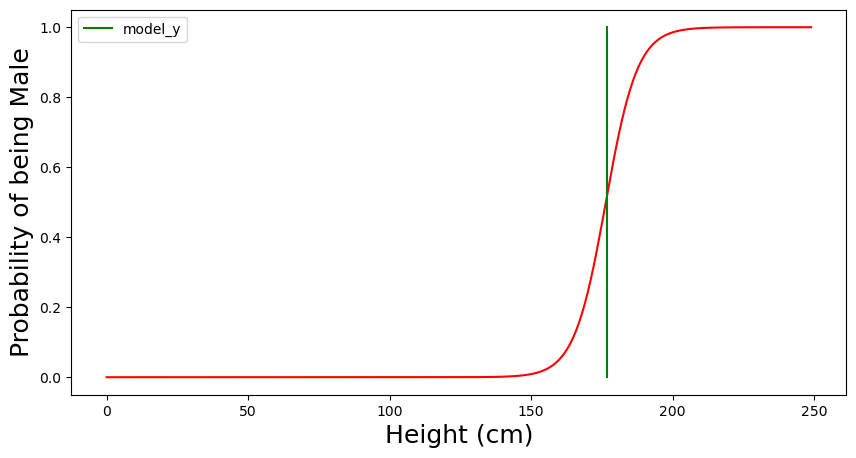

In [164]:
# Visulaize the prediction
# Estimate X-value (height) threshold with 50% of probability of being male 
per50_prob=p_y[p_y>=0.5].index[0]

# print statement with answer
answer=' The height at which it shows 50% probability an individual being male or female is 177cm'
print(answer.format(per50_prob))

# model curve visualization and data histogram
per50_line=pd.DataFrame({'model_x':[per50_prob,per50_prob],'model_y':[0,1]})
fig,ax=plt.subplots(1,1,figsize=(10,5))

#S-Curve plot
p_y.plot(color='red',ax=ax)
per50_line.plot(x='model_x',color='green', ax=ax)
ax.set_xlabel('Height (cm)', fontsize= 18)
ax.set_ylabel('Probability of being Male', fontsize=18)

# A height of 177 cm marks the 50% threshold that disguishes the difference between male and female. If a person is shorter than 177cm, they are more likely to be female. If the person is exactly 177cm tall, the probability is 50/50.